<a href="https://colab.research.google.com/github/malikshahzaib7238/Digit-Recognition/blob/main/MNIST_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
import numpy as np

In [ ]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Training data:


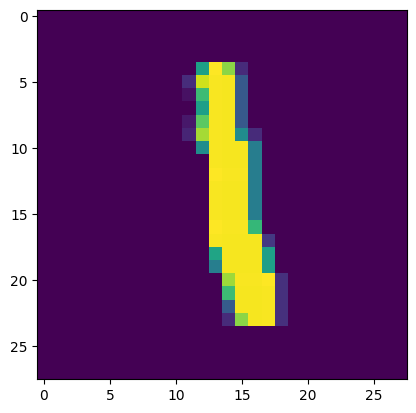

Label of this image is 1


In [ ]:
import matplotlib.pyplot as plt
print("Training data:")
plt.imshow(xtrain[6])
plt.show()
print("Label of this image is",ytrain[6])

In [ ]:
xtrain=np.reshape(xtrain,(-1,28,28,1))
xtest=np.reshape(xtest,(-1,28,28,1))
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000,), (10000,))

In [ ]:
xtrain=xtrain/255
xtest=xtest/255

In [ ]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(ytrain, num_classes=10)
y_test = to_categorical(ytest, num_classes=10)

In [ ]:

from keras.models import Sequential

In [ ]:
model=Sequential()

In [ ]:
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [ ]:
model.add(Conv2D(32,kernel_size=5,strides=1,padding="Same",activation="relu",input_shape=(28,28,1)))
model.add(MaxPooling2D(padding="same"))
model.add(Conv2D(64,kernel_size=5,strides=1,padding="same",activation="relu"))
model.add(MaxPooling2D(padding="same"))
model.add(Flatten())
model.add(Dense(1024,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10,activation="sigmoid"))

In [ ]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint


# Define the ModelCheckpoint callback
checkpoint_path = "best_model.h5"
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='accuracy',    # Choose the metric to monitor for finding the best model
    save_best_only=True,   # Save only the best model during training
    save_weights_only=False,
    verbose=1
)


In [ ]:
model.fit(xtrain,y_train,batch_size=100,epochs=5,validation_data=(xtest,y_test),  callbacks=[checkpoint_callback])

Epoch 1/5
600/600 [==============================] - ETA: 0s - loss: 0.1259 - accuracy: 0.9611
Epoch 1: accuracy improved from -inf to 0.96112, saving model to best_model.h5
600/600 [==============================] - 252s 418ms/step - loss: 0.1259 - accuracy: 0.9611 - val_loss: 0.0345 - val_accuracy: 0.9880
Epoch 2/5
600/600 [==============================] - ETA: 0s - loss: 0.0367 - accuracy: 0.9886
Epoch 2: accuracy improved from 0.96112 to 0.98863, saving model to best_model.h5
600/600 [==============================] - 244s 407ms/step - loss: 0.0367 - accuracy: 0.9886 - val_loss: 0.0280 - val_accuracy: 0.9903
Epoch 3/5
600/600 [==============================] - ETA: 0s - loss: 0.0264 - accuracy: 0.9915
Epoch 3: accuracy improved from 0.98863 to 0.99152, saving model to best_model.h5
600/600 [==============================] - 242s 404ms/step - loss: 0.0264 - accuracy: 0.9915 - val_loss: 0.0297 - val_accuracy: 0.9891
Epoch 4/5
600/600 [==============================] - ETA: 0s - loss

In [ ]:
model.evaluate(xtrain,y_train),model.evaluate(xtest,y_test)

313/313 [==============================] - 10s 32ms/step - loss: 0.0335 - accuracy: 0.9889


([0.01561794150620699, 0.9954000115394592],
 [0.033466897904872894, 0.9889000058174133])

1/1 [==============================] - 0s 25ms/step


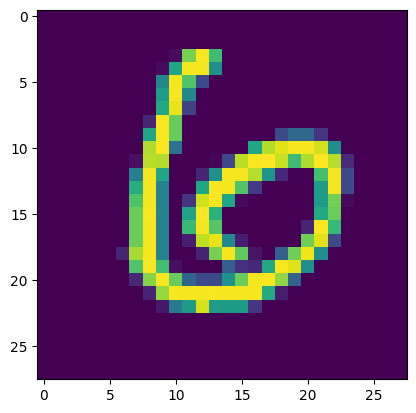

Predicted label: 6
True label: 6


In [ ]:
import tensorflow as tf
import numpy as np
from PIL import Image
i = 11 #change this value to check different images
custom_image = np.array(xtest[i])
custom_image = custom_image.reshape(-1,28,28,1)  # Reshape the image to match the model's input shape

predictions = model.predict(custom_image)
predicted_label = np.argmax(predictions)
plt.imshow(xtest[i])
plt.show()
print(f"Predicted label: {predicted_label}")
true_label = np.argmax(y_test[i])
print(f"True label: {true_label}")
